I want to find better predictors than the ones I have been using so far. So I will be comparing the coefficients for the linear models, to figure out if any might be redundant.

In [ ]:
import pickle
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [168]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# data

In [154]:
# import 10 fold validation with 160 predictors

linearCoefs160 = pd.read_pickle('linearCoefs160.pkl')
linearScores160 = pd.read_pickle('linearScores160.pkl')

median_coefficients160 = linearCoefs160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.median)


In [147]:
linearCoefs8 = pd.read_pickle('linearCoefs8.pkl')
linearScores8 = pd.read_pickle('linearScores8.pkl')

median_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.median)


In [45]:
# Load dataset with velocity values
vdata = sc.read_h5ad("velocity_adata.h5ad")

In [46]:
# Scale Ms and velocity layer with zero mean and unit variance 
    # sc.pp.scale adds most recent mean and std as variables to var

sc.pp.scale(vdata, layer='Ms')
sc.pp.scale(vdata, layer='velocity')

In [315]:
# load 160 transcriptionfactors
open_file = open('data/transcriptionfactors160.pkl', "rb")
transcription160 = pickle.load(open_file)
open_file.close()

In [316]:
# remove factors not available in vdata.var_names
for x in  ['Junb', 'mt-Nd1', 'Fgl2', 'mt-Co1', 'mt-Nd4', 'Rraga', 'mt-Nd2']:
    if x in transcription160:
        transcription160.remove(x)

In [33]:
median_coefficients160.query('predictors==["Klf2"]').values.tolist()

[[-0.11102931201457977,
  0.12266391515731812,
  -0.032654475420713425,
  -0.04834742844104767,
  -0.10444724559783936,
  -0.08692960441112518,
  -0.2023894041776657,
  -0.1428593397140503,
  -0.03556804731488228,
  -0.0034798646811395884,
  -0.0729626789689064,
  0.014557130634784698,
  0.07559936493635178,
  0.10642319917678833,
  0.08081623911857605,
  0.06792644411325455,
  -0.07795913517475128,
  0.06162545830011368,
  -0.059614840894937515,
  -0.12356328964233398,
  -0.04616298899054527,
  0.03563296049833298,
  0.21426735818386078,
  -0.10230271518230438,
  -0.019474076107144356,
  -0.03300219029188156,
  -0.09318733960390091,
  0.13766279816627502,
  -0.17026054859161377,
  0.0961042270064354,
  -0.22583121061325073,
  -0.037784017622470856,
  -0.04883790388703346,
  -0.13122516870498657,
  0.2076142430305481,
  -0.07537936419248581,
  0.09923762083053589,
  0.16012656688690186,
  0.10590186715126038,
  -0.21834513545036316,
  0.26524031162261963,
  0.1020340546965599,
  0.1892

In [42]:
len(median_coefficients160.query('predictors==["Klf2"]').values.tolist()[0])

1109

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


11009

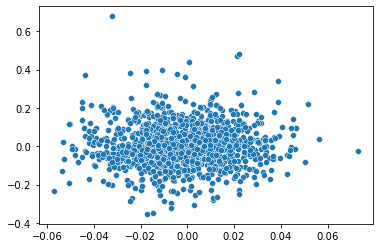

In [44]:
# plot everything
sns.scatterplot(median_coefficients160.query('predictors==["Acly"]').values.tolist()[0], median_coefficients160.query('predictors==["Klf2"]').values.tolist()[0])
len(list(range(1, 11010)))



In [77]:
vdata[:,['Klf2', 'Tox']].layers['Ms'].copy()

array([-0.8905696, -1.3787374], dtype=float32)

In [ ]:
sns.lineplot(vdata[:,['Klf2', 'Tox']].layers['Ms'].copy())

# Pearson Correlation coefficient
Using the regressions. 

In [164]:
median_coefficients160 = linearCoefs160.pivot_table(columns="predictors", index="target", values="coefficients", aggfunc = np.median)
median_coefficients8 = linearCoefs8.pivot_table(columns="predictors", index="target", values="coefficients", aggfunc = np.median)

In [314]:
# suppress scientific notation
np.set_printoptions(suppress=True)

corr = median_coefficients160.corr()

#corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2).data.to_csv('correlations160.csv')
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [166]:
# suppress scientific notation
np.set_printoptions(suppress=True)

corr = median_coefficients8.corr()

corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

predictors,Cdk4,Hif1a,Hmgb2,Klf2,Mcm3,Mcm5,Mcm6,Tox
predictors,,,,,,,,
Cdk4,1.00,-0.03,-0.01,0.19,-0.21,-0.01,-0.01,0.27
Hif1a,-0.03,1.00,0.01,0.03,0.04,-0.01,-0.07,-0.03
Hmgb2,-0.01,0.01,1.00,-0.04,-0.05,-0.28,0.26,0.01
Klf2,0.19,0.03,-0.04,1.00,-0.08,0.11,-0.01,0.27
Mcm3,-0.21,0.04,-0.05,-0.08,1.00,-0.62,-0.47,-0.06
Mcm5,-0.01,-0.01,-0.28,0.11,-0.62,1.00,-0.20,0.25
Mcm6,-0.01,-0.07,0.26,-0.01,-0.47,-0.20,1.00,-0.22
Tox,0.27,-0.03,0.01,0.27,-0.06,0.25,-0.22,1.00


# Clustering the Coefficient Values.

## Agglomerative Clustering

Clustering gene expression profiles

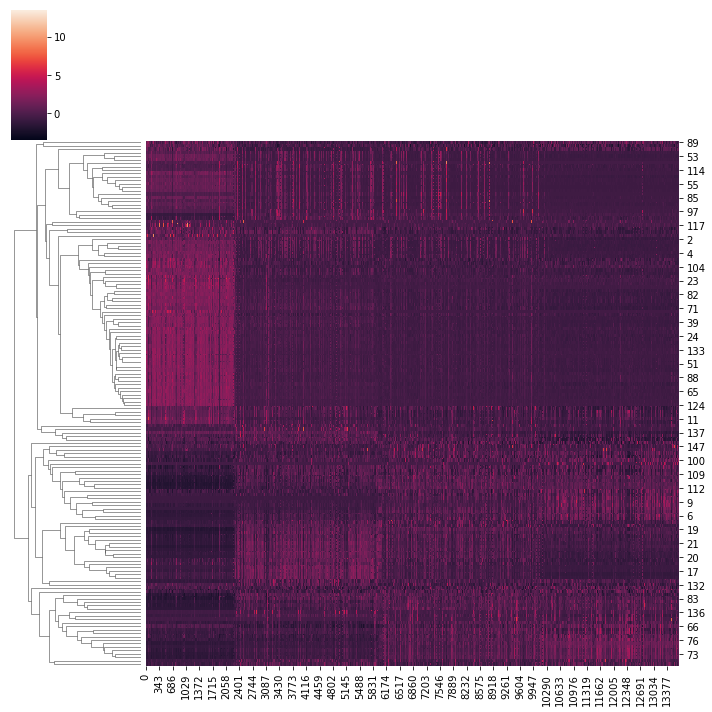

In [345]:
gene_expression = vdata[:,transcription160].layers['Ms'].transpose()
sns.clustermap(gene_expression, method='average', col_cluster=False)



## K-Means Clustering

Clustering gene expression profiles

In [340]:
random_state = 42
X = vdata[:,transcription160].layers['Ms'].transpose()

y_pred = KMeans(n_clusters=8).fit_predict(X)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [341]:
index = vdata[:, transcription160].var_names

clusters = pd.DataFrame(list(zip(y_pred , index)), columns =['cluster', 'predictor'])
clusters.groupby('cluster').count()

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,predictor
cluster,
0,20
1,43
2,10
3,15
4,17
5,18
6,19
7,10


Clustering regression coefficients

In [319]:
random_state = 42
X = linearCoefs160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.median)


y_pred = KMeans(n_clusters=2).fit_predict(X.iloc[1:50])

#plt.subplot(221)
#plt.scatter(, c=y_pred)
#plt.title("Incorrect Number of Blobs")

In [321]:
clusters = pd.DataFrame(list(zip(y_pred ,X.index)), columns =['cluster', 'predictor'])
clusters.groupby('cluster').count()

AttributeError: 'ArrayView' object has no attribute 'index'

In [251]:
l = clusters[clusters['cluster']==4].predictor.values.tolist()
l

['Arl6ip1',
 'Asf1b',
 'Birc5',
 'Cenpa',
 'Cenpf',
 'Eif5a',
 'Gmnn',
 'H2afv',
 'Ifi27l2a',
 'Klf2',
 'Ldha',
 'Lsp1',
 'Nhp2',
 'Phb2',
 'Rplp2',
 'Rps12',
 'Rps27',
 'Rrm2',
 'S100a4',
 'Top2a',
 'Tuba1b',
 'Ung']

In [254]:
counts = {new:[] for new in clusters['predictor']}

n_clusters = clusters['cluster'].drop_duplicates().tolist()

for i in n_clusters:
    group = clusters[clusters['cluster']==i].predictor.values.tolist()
    for g in group:
        counts[g]=
        
    

In [256]:
counts['Klf2']

['Arl6ip1',
 'Asf1b',
 'Birc5',
 'Cenpa',
 'Cenpf',
 'Eif5a',
 'Gmnn',
 'H2afv',
 'Ifi27l2a',
 'Klf2',
 'Ldha',
 'Lsp1',
 'Nhp2',
 'Phb2',
 'Rplp2',
 'Rps12',
 'Rps27',
 'Rrm2',
 'S100a4',
 'Top2a',
 'Tuba1b',
 'Ung']

In [258]:

for p in clusters['predictor']:
    for x in clusters['predictor']:
            counts[p].count(x)

NameError: name 'count' is not defined